# Create and optimize non-linear optimization problems in IPOPT solver

### Install IPOPT solver

Install cyipopt module in Python with `conda install -c conda-forge cyipopt`

In [1]:
import numpy as np
import ipopt

### Minimize Rosenbrock fucntion

Rosenbrock function with 2 variables:
\begin{equation}
\displaystyle f(x_1,x_2) = (1-x_1)^2 + 100 (x_2-x_1^2)^2
\end{equation}

In [2]:
def rosenbrock(x1,x2):
      return (1-x1)**2 + 100* ((x2-x1**2))**2

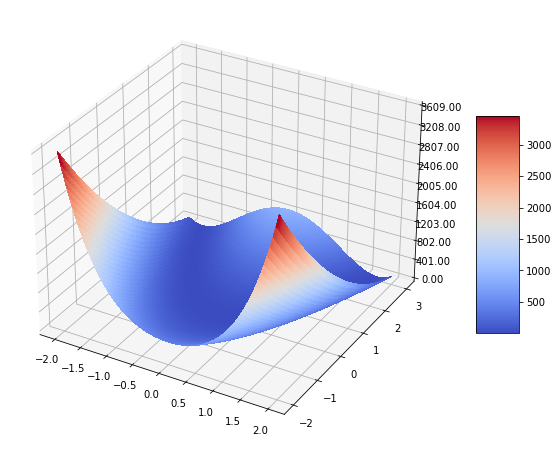

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plot
%matplotlib inline

fig = plot.figure(figsize=(12,8))
ax = fig.gca(projection='3d')

s = 0.05   # Try s=1, 0.25, 0.1, or 0.05
X = np.arange(-2, 2.+s, s)   #Could use linspace instead if dividing
Y = np.arange(-2, 3.+s, s)   #evenly instead of stepping...
    
#Create the mesh grid(s) for all X/Y combos.
X, Y = np.meshgrid(X, Y)

#Rosenbrock function w/ two parameters using numpy Arrays
Z = (1.-X)**2 + 100.*(Y-X*X)**2

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
         linewidth=0, antialiased=False)  #Try coolwarm vs jet

 
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

#Displays the figure, handles user interface, returns when user closes window
plot.show()

Minimize Rosenbrock function with 5 variables.

In [4]:
from scipy.optimize import rosen, rosen_der
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = ipopt.minimize_ipopt(rosen, x0, jac=rosen_der)
print(res)

     fun: 2.1078757600383306e-18
    info: {'x': array([1., 1., 1., 1., 1.]), 'g': array([], dtype=float64), 'obj_val': 2.1078757600383306e-18, 'mult_g': array([], dtype=float64), 'mult_x_L': array([0., 0., 0., 0., 0.]), 'mult_x_U': array([0., 0., 0., 0., 0.]), 'status': 0, 'status_msg': b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'}
 message: b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
    nfev: 200
     nit: 37
    njev: 39
  status: 0
 success: True
       x: array([1., 1., 1., 1., 1.])


### Minimize non-linear function with 5 variables and linear constraints

Non-linear optimization problem with linear constraints:
\begin{equation}
\begin{array}{rl}
\displaystyle \mbox{min}_{x} & (x_1 - x_2)^2 + (x_2 + x_3 - 2)^2 + (x_4 - 1)^2 + (x_5 - 1)^2 \\
{\rm s.t.} & x_1 + 3 x_2 = 4 \\
& x_3 + x_4 -2 x_5 = 0 \\
& x_2 - x_5 = 0
\end{array}
\end{equation}

In [5]:
class hs051(object):
    def __init__(self):
        pass

    def objective(self, x):
        # The callback for calculating the objective
        return (x[0] - x[1])**2 + (x[1] + x[2] - 2)**2 + (x[3] - 1)**2 + (x[4] - 1)**2

    def gradient(self, x):
        # The callback for calculating the gradient
        return np.array(2*[
                    x[0] - x[1],
                    x[1] + x[2] - 2 - x[0] + x[1],
                    x[1] + x[2] - 2.0,
                    x[3] - 1,
                    x[4] - 1            
                    ])

    def constraints(self, x):
        # The callback for calculating the constraints
        return np.array([
                    x[0] + 3*x[1],
                    x[2] + x[3] - 2*x[4],
                    x[1] - x[4]
                    ])

    def jacobian(self, x):
        # The callback for calculating the Jacobian
        return np.array([[1,  3,  0,  0,  0],
                         [0,  0,  1,  1, -2],
                         [0,  1,  0,  1, -1]])

    def intermediate(
            self,
            alg_mod,
            iter_count,
            obj_value,
            inf_pr,
            inf_du,
            mu,
            d_norm,
            regularization_size,
            alpha_du,
            alpha_pr,
            ls_trials
            ):

        # Example for the use of the intermediate callback.
        print("Objective value at iteration #%d is - %g" % (iter_count, obj_value))

In [6]:
# Define the problem
x0 = [2.5, 0.5, 2, -1, 0.5]
cl = [4.0, 0, 0]
cu = [4.0, 0, 0]

nlp = ipopt.problem(
                n=len(x0),
                m=len(cl),
                problem_obj=hs051(),
                cl=cl,
                cu=cu
                )

# Set solver options
nlp.addOption('jac_c_constant'.encode('utf-8'), 'yes'.encode('utf-8'))
nlp.addOption('jac_d_constant'.encode('utf-8'), 'yes'.encode('utf-8'))
nlp.addOption('hessian_approximation'.encode('utf-8'), 'limited-memory'.encode('utf-8'))
nlp.addOption('mu_strategy'.encode('utf-8'), 'adaptive'.encode('utf-8'))
nlp.addOption('tol'.encode('utf-8'), 1e-7)

# Solve the problem
x, info = nlp.solve(x0)

print("Solution of the primal variables: x=%s\n" % repr(x))

print("Solution of the dual variables: lambda=%s\n" % repr(info['mult_g']))

print("Objective=%s\n" % repr(info['obj_val']))

Objective value at iteration #0 is - 8.5
Objective value at iteration #1 is - 7.20139
Objective value at iteration #2 is - 4.80582
Objective value at iteration #3 is - 3.46753
Objective value at iteration #4 is - 2.2875
Objective value at iteration #5 is - 1.4977
Objective value at iteration #6 is - 0.975631
Objective value at iteration #7 is - 0.634888
Objective value at iteration #8 is - 0.412939
Objective value at iteration #9 is - 0.268567
Objective value at iteration #10 is - 0.174666
Objective value at iteration #11 is - 0.113597
Objective value at iteration #12 is - 0.0738788
Objective value at iteration #13 is - 0.0480492
Objective value at iteration #14 is - 0.0312477
Objective value at iteration #15 is - 0.0203254
Objective value at iteration #16 is - 0.0132141
Objective value at iteration #17 is - 0.00860231
Objective value at iteration #18 is - 0.00558275
Objective value at iteration #19 is - 0.00365682
Objective value at iteration #20 is - 0.00235628
Objective value at ite

In [7]:
info

{'x': array([1.00000019, 0.99999994, 1.00000039, 0.99999965, 1.00000002]),
 'g': array([ 4.00000000e+00,  0.00000000e+00, -8.48421714e-08]),
 'obj_val': 2.9844528448486816e-13,
 'mult_g': array([-2.52845000e-07, -3.31154677e-07,  6.83627434e-07]),
 'mult_x_L': array([0., 0., 0., 0., 0.]),
 'mult_x_U': array([0., 0., 0., 0., 0.]),
 'status': 0,
 'status_msg': b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'}

### Minimize non-linear function with 4 variables and non-linear constraints

Non-linear optimization problem with non-linear constraints:
\begin{equation}
\begin{array}{rl}
\displaystyle \mbox{min}_{x} & x_1 \cdot x_4 \cdot (x_1 + x_2 + x_3) + x_3 \\
{\rm s.t.} & x_1 \cdot x_2 \cdot x_3 \cdot x_4 \geq 25 \\
& x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40 \\
& 1 \leq x_1,x_2,x_3,x_4 \leq 5
\end{array}
\end{equation}

In [8]:
class hs071(object):
    def __init__(self):
        pass

    def objective(self, x):
        # The callback for calculating the objective
        return x[0] * x[3] * np.sum(x[0:3]) + x[2]

    def gradient(self, x):
        # The callback for calculating the gradient
        return np.array([
                    x[0] * x[3] + x[3] * np.sum(x[0:3]),
                    x[0] * x[3],
                    x[0] * x[3] + 1.0,
                    x[0] * np.sum(x[0:3])
                    ])

    def constraints(self, x):
        # The callback for calculating the constraints
        return np.array((np.prod(x), np.dot(x, x)))

    def jacobian(self, x):
        # The callback for calculating the Jacobian
        return np.concatenate((np.prod(x) / x, 2*x))

    def hessianstructure(self):
        # The structure of the Hessian
        # Note:
        # The default hessian structure is of a lower triangular matrix. Therefore
        # this function is redundant. I include it as an example for structure
        # callback.

        return np.nonzero(np.tril(np.ones((4, 4))))

    def hessian(self, x, lagrange, obj_factor):
        # The callback for calculating the Hessian
        H = obj_factor*np.array((
                (2*x[3], 0, 0, 0),
                (x[3],   0, 0, 0),
                (x[3],   0, 0, 0),
                (2*x[0]+x[1]+x[2], x[0], x[0], 0)))

        H += lagrange[0]*np.array((
                (0, 0, 0, 0),
                (x[2]*x[3], 0, 0, 0),
                (x[1]*x[3], x[0]*x[3], 0, 0),
                (x[1]*x[2], x[0]*x[2], x[0]*x[1], 0)))

        H += lagrange[1]*2*np.eye(4)

        row, col = self.hessianstructure()

        return H[row, col]

    def intermediate(
            self,
            alg_mod,
            iter_count,
            obj_value,
            inf_pr,
            inf_du,
            mu,
            d_norm,
            regularization_size,
            alpha_du,
            alpha_pr,
            ls_trials
            ):

        # Example for the use of the intermediate callback.
        print("Objective value at iteration #%d is - %g" % (iter_count, obj_value))

In [9]:
# Define the problem
x0 = [1.0, 5.0, 5.0, 1.0]

lb = [1.0, 1.0, 1.0, 1.0]
ub = [5.0, 5.0, 5.0, 5.0]

cl = [25.0, 40.0]

cu = [2.0e19, 40.0]

nlp = ipopt.problem(
                n=len(x0),
                m=len(cl),
                problem_obj=hs071(),
                lb=lb,
                ub=ub,
                cl=cl,
                cu=cu
                )

# Set solver options
#nlp.addOption('derivative_test'.encode('utf-8'), 'second-order'.encode('utf-8'))
nlp.addOption('mu_strategy'.encode('utf-8'), 'adaptive'.encode('utf-8'))
nlp.addOption('tol'.encode('utf-8'), 1e-7)

# Scale the problem (Just for demonstration purposes)
#nlp.setProblemScaling(
#    obj_scaling=2,
#    x_scaling=[1, 1, 1, 1]
#    )
#nlp.addOption('nlp_scaling_method'.encode('utf-8'), 'user-scaling'.encode('utf-8'))

# Solve the problem
x, info = nlp.solve(x0)

print("Solution of the primal variables: x=%s\n" % repr(x))

print("Solution of the dual variables: lambda=%s\n" % repr(info['mult_g']))

print("Objective=%s\n" % repr(info['obj_val']))

Objective value at iteration #0 is - 16.1097
Objective value at iteration #1 is - 17.4104
Objective value at iteration #2 is - 18.0016
Objective value at iteration #3 is - 17.1995
Objective value at iteration #4 is - 16.941
Objective value at iteration #5 is - 17.0034
Objective value at iteration #6 is - 17.014
Objective value at iteration #7 is - 17.014
Objective value at iteration #8 is - 17.014
Solution of the primal variables: x=array([1.        , 4.74299964, 3.82114998, 1.37940829])

Solution of the dual variables: lambda=array([-0.55229366,  0.16146856])

Objective=17.014017140224134

